# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [47]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt
import random


from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [3]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-5.9704)


## Sampling from categorical probabilities with given probabilities

In [37]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.999, 0.001])))
print(x)

tensor(0)


## Animating data

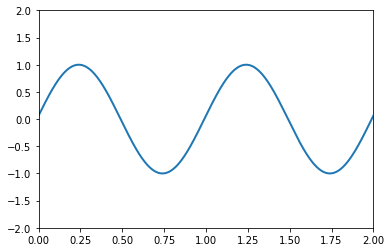

In [6]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

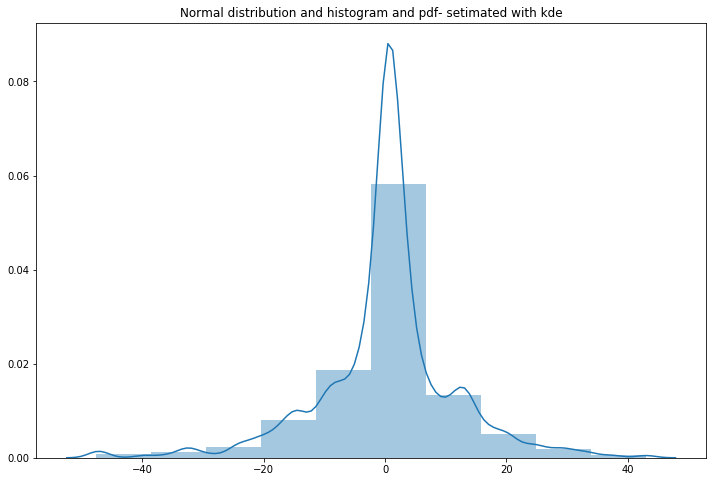

In [9]:
import seaborn as sns
x = np.random.normal(size = 100)
# plt.hist(x, density=True, bins=30)
#plt.ylabel('Probability');

#sns.distplot(x, kde=True).set_title('Normal distribution and histogram and pdf- setimated with kde')

mean = 0
variance = 10

animate_data = []
def animate_gaussian(num, data_animate):
    data_animate.append(pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance)))
    fig.clear()
    # hist = plt.hist(data, density=True, bins=30)
    sns.distplot(data_animate, bins=10, kde=True).set_title('Normal distribution and histogram and pdf- setimated with kde')


data_animate = [pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))]
fig = plt.figure(figsize=(12, 8))

anim = animation.FuncAnimation(fig, animate_gaussian, 100, fargs=(data, ))
HTML(anim.to_jshtml())

 ## Task 1

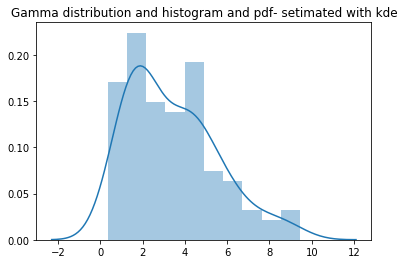

In [16]:
import seaborn as sns

def get_random_gamma_sample(concentration=3, rate=1):
     return pyro.sample("gamma", pyro.distributions.Gamma(concentration, rate, validate_args=None))


number_of_frames = 100

def update_hist(num, data):
    plt.cla()
    data.append(get_random_gamma_sample())
    # plt.hist(data, density=True, bins=30)
    sns.distplot(data, bins=10, kde=True, ).set_title('Gamma distribution and histogram and pdf- setimated with kde')


data = [get_random_gamma_sample()]
fig = plt.figure()

anim = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ))
HTML(anim.to_jshtml())

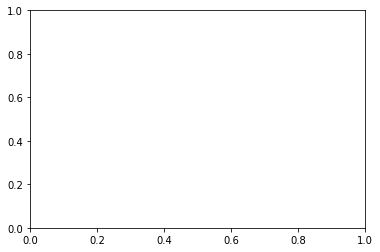

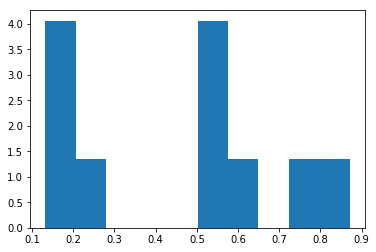

In [39]:
## Insert solution here

from pprint import pprint

def get_random_gamma_sample(concentration=10, rate=10):
     return pyro.sample("gamma", pyro.distributions.Gamma(concentration, rate, validate_args=None))

    
def check_random_gamma():
    for i in range(1000):
        print(get_random_gamma_sample())

#data = [get_random_gamma_sample() for i in range(100)]
#pprint(data[:5])

#plt.hist(data, )



def animate_gaussian():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    #ax.set_xlim(( 0, 2))
    #ax.set_ylim((-2, 2))

    #line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    data = []
    def gaussian():
        data.append(get_random_gamma_sample())
        
    # initialization function: plot the background of each frame
    def init():
#         line.set_data([], [])
#         return (line,)
        return [get_random_gamma_sample()]
    # call the animator. blit=True means only re-draw the parts that have changed.
#     anim = animation.FuncAnimation(fig, sin, init_func=init,
#                                    frames=100, interval=20, blit=True)
    



    n = 100
    number_of_frames = 10
    data = np.random.rand(n, number_of_frames)

    def update_hist(num, data):
        plt.cla()
        plt.hist(data[num], density=True)

    fig = plt.figure()
    hist = plt.hist(data[0])

    anim = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
    return HTML(anim.to_jshtml())

animate_gaussian()

## Task 2

In [14]:
## Insert solution here

In [17]:
def get_parameter_space():
    population_denominator = 50000
    affected_nominators = range(1, 101)
    return [i/population_denominator for i in affected_nominators]

In [57]:
def check_probability(probability):
    # x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([float(1), 0])))
    # return x
     return random.random() < probability

    
def simulate(population_size=1000000, false_positive_prob=0.02, false_negative_prob=0.01):
    population_size = population_size
    false_positive_prob = false_positive_prob
    false_negative_prob = false_negative_prob
    
    results = []
    
    for parameter in get_parameter_space():

        diagnozed_sick = 0
        diagnozed_healthy = 0
        
        false_negatives = 0
        false_positives = 0
        true_positives = 0
        true_negatives = 0
        
        for person in range(population_size):
            person_sick = check_probability(parameter)
            if person_sick:
                if check_probability(false_negative_prob):
                    diagnozed_healthy += 1
                    false_negatives += 1 
                else:
                    diagnozed_sick += 1
                    true_positives += 1
            else:
                if check_probability(false_positive_prob):
                    diagnozed_sick += 1
                    false_positives += 1
                else:
                    diagnozed_healthy += 1
                    true_negatives += 1
                
        
        # probability that person is really sick, given test 
        # showed he/she tested positive for disease
        correctly_diagnozed_sick_prob = (true_positives) / (true_positives + false_positives)
        
        results.append(correctly_diagnozed_sick_prob)      
        
#         print("For population {}, and probability of being sick {}".format(population_size, parameter))
#         print("diagnozed healthy: {}, diagnozed sick: {}".format(diagnozed_healthy, diagnozed_sick))
#         print("false positives: {}, false negatives: {}".format(false_positives, false_negatives))
#         print("Probability that person is sick, given he/she was tested positive: {}"
#               .format(correctly_diagnozed_sick_prob))
#         print("=====================================================")
    return results, get_parameter_space()
        
            
    # P(A) - person is sick
    # P(B) - results are positive
    # P(B|A) - .98 (1-.02)



In [58]:
def bayes(p_b_under_a, p_a, p_b):
    # P(A|B) = P(B|A) * P(A) / P(B)
    return p_b_under_a * p_a / p_b

def calculate_bayes(false_positive_prob=0.02, false_negative_prob=0.01):
    parameter_space = get_parameter_space()
    
    results = []
    
    for parameter in parameter_space:
        # When a random person gets tested for the disease and the 
        # result comes back positive, what is the probability that the person has the disease?
        
        # P(A) - person is sick
        # P(B) - person tested positive
        #   - P(B) = P(B and A) + P(B and A') = P(B|A) * P(A) + P(B|A') * P(A')
        # P(B|A) - (1 - false_positive_prob)
        p_b_under_a = 1 - false_positive_prob
        p_a = parameter
        p_b = (1-false_positive_prob) * p_a + false_positive_prob * (1 - p_a)
        results.append(bayes(p_b_under_a, p_a, p_b))
    return results, parameter_space

Simulate for population of 1000


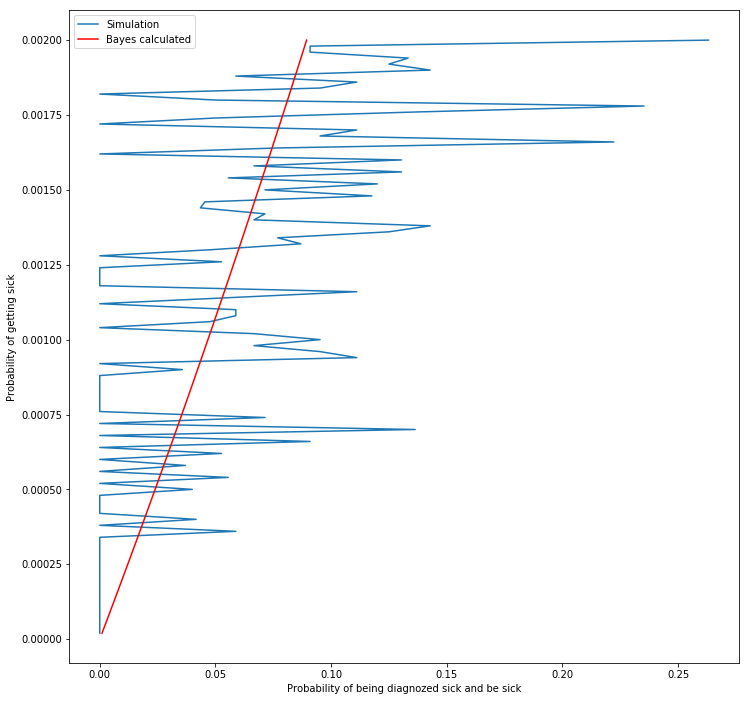

Simulate for population of 100000


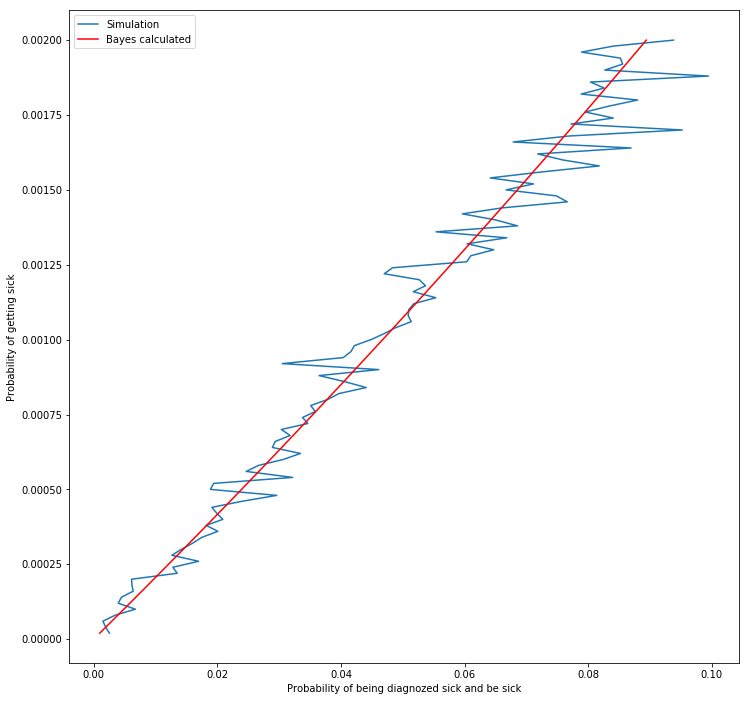

Simulate for population of 1000000


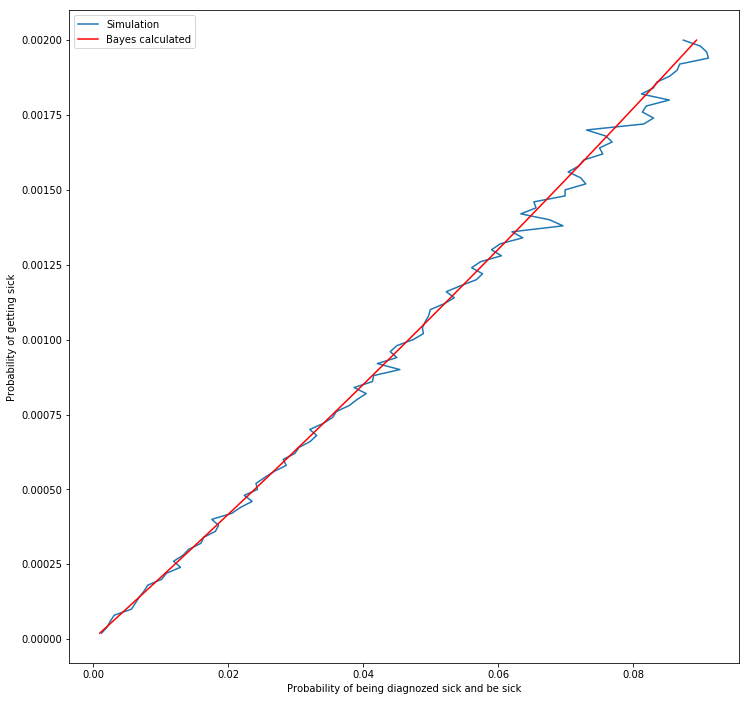

In [61]:
for population_size in [1000, 100000, 1000000]:
    print("Simulation for population of {}".format(population_size))
    res, parameters = simulate(population_size=population_size)
    res_bayes, bayes_parameters = calculate_bayes()
    
    fig = plt.figure(figsize=(12, 12))
    plt.ylabel('Probability of getting sick')
    plt.xlabel('Probability of being diagnozed sick and be sick')
    plt.plot(res, parameters, label='Simulation')
    plt.plot(res_bayes, bayes_parameters, color='red', label='Bayes calculated')
    plt.legend()
    plt.show()
